# Time Series Analysis
## GJR-GARCH model
Ref: https://arch.readthedocs.io/en/latest/index.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

!pip install arch
from arch import arch_model

from models import garch

In [2]:
# Import data
path = 'data/^GSPC.csv'
series = pd.read_csv(path, index_col=['Date'], skiprows=None, parse_dates=['Date'])

# Transform series into returns
data = series['Adj Close'].pct_change().dropna() * 100

# Set the limit of learning sample
n_predict = 100
split_date = data.index[-n_predict]

In [3]:
# Initialize GARCH parameters
p = range(5)
o = [0, 1]
q = range(5)

In [4]:
%%time

# Optimize model
p, o, q = garch.optimize(data, p, o, q, split_date=split_date, display=True)


Number of combinations = 50




(p, o, q)          AIC           Iterations   
(0, 1, 0) 	|    6554.9729     |       6/50      
(0, 1, 1) 	|    5831.8680     |       7/50      


Optimized model GARCH(0, 1, 1)

CPU times: user 7.76 s, sys: 106 ms, total: 7.87 s
Wall time: 7.81 s


In [5]:
# Build model
model = arch_model(data, vol='Garch', p=p, o=o, q=q)
results = model.fit(last_obs=split_date, disp='off')
print(results.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2911.93
Distribution:                  Normal   AIC:                           5831.87
Method:            Maximum Likelihood   BIC:                           5855.03
                                        No. Observations:                 2418
Date:                Wed, Apr 17 2019   Df Residuals:                     2414
Time:                        20:50:50   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0387  1.390e-02      2.785  5.351e-03 [1.

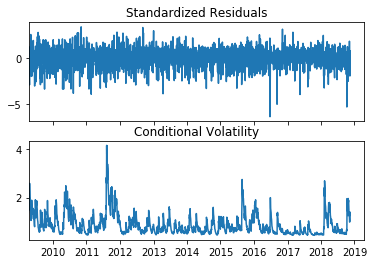

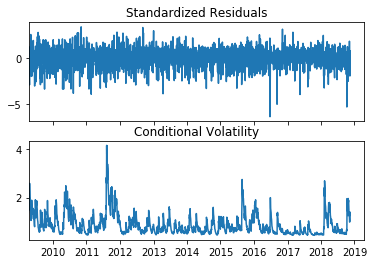

In [6]:
# Plot standardized residuals and conditional volatility
results.plot()


Forecasting horizon 2018-11-16 00:00:00 - 2019-04-12 00:00:00



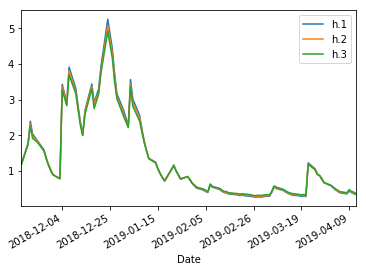

In [7]:
# Forecast
print('\nForecasting horizon {} - {}\n'.format(split_date, data.index[-1]))
forecasts = results.forecast(horizon=3, start=split_date, method='simulation')
forecasts.variance[split_date:].plot()